
* 시험용 데이터로 측정한 정확도 = 1.00
* 학습용 데이터로 측정한 정확도 = 0.97


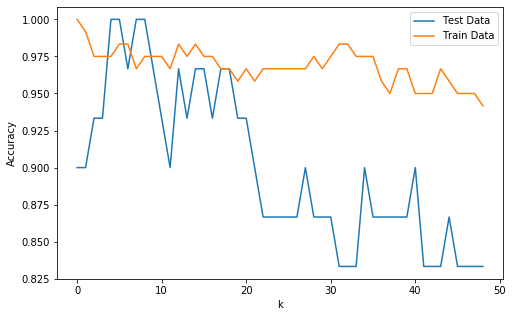

In [1]:
# KNN으로 iris 데이터를 학습한다.
#
# scikit-learn을 최신 버전으로 업데이트한다 (ver. 0.22)
# pip install -U scikit-learn
# ---------------------------------------------------
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

# print(iris.keys())
# print(iris['data'])
# print(iris['target'])
# print(iris['DESCR'])
# print(iris['target_names'])
# print(iris['feature_names'])
# print(iris['data'].shape)

# Train 데이터 세트와 Test 데이터 세트를 구성한다
trainX, testX, trainY, testY = \
    train_test_split(iris['data'], iris['target'], test_size = 0.2)

# KNN 으로 Train 데이터 세트를 학습한다.
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(trainX, trainY)

# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
# accuracy = knn.score(testX, testY)와 동일함.
predY = knn.predict(testX)
accuracy = (testY == predY).mean()
print()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % accuracy)

# Train 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
predY = knn.predict(trainX)
accuracy = (trainY == predY).mean()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % accuracy)

# k를 변화시켜가면서 정확도를 측정해 본다
testAcc = []
trainAcc = []
for k in range(1, 50):
    # KNN 으로 Train 데이터 세트를 학습한다.
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(trainX, trainY)
    
    # Test 세트의 Feature에 대한 정확도
    predY = knn.predict(testX)
    testAcc.append((testY == predY).sum() / len(predY))
    
    # Train 세트의 Feature에 대한 정확도
    predY = knn.predict(trainX)
    trainAcc.append((trainY == predY).sum() / len(predY))

plt.figure(figsize=(8, 5))
plt.plot(testAcc, label="Test Data")
plt.plot(trainAcc, label="Train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

